# **Gestion de Datos Faltantes  Erroneos**

##Como revisar y eliminar datos faltantes

## **Comandos pandas para Gestion de Datos**
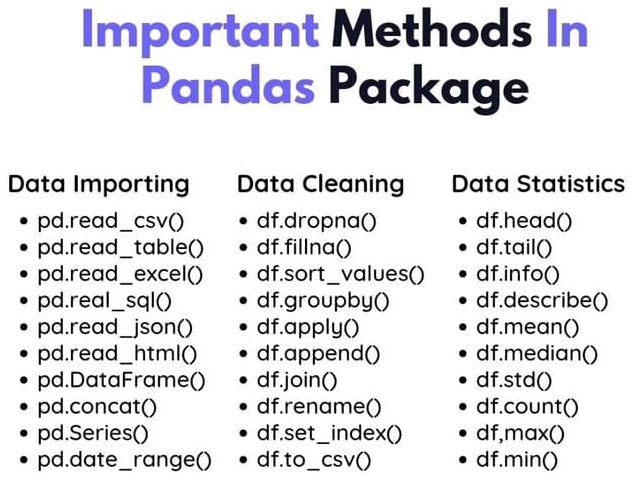

In [1]:
# Carga de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [19]:
#Cargamos los CSV con los Datos
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/"
print(base_dir)
print("\n")

#Cargamos los CSV con los Datos
clientes = pd.read_csv(base_dir + "clientes.csv", sep=";")
clientes
# En los datos que observamos NaN: Not a Number (Valor Nulo)

/content/gdrive/MyDrive/Colab Notebooks/data/




,nombre,edad,ingreso
0,Juan,35.0,15800.0
1,Luisa,25.0,17000.0
2,NaN,70.0,20000.0
3,Carmen,49.0,22000.0
4,NaN,NaN,NaN
5,Mario,30.0,15800.0
6,Pedro,NaN,17400.0
7,Gustavo,27.0,NaN
8,Carlos,NaN,NaN


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nombre   7 non-null      object 
 1   edad     6 non-null      float64
 2   ingreso  6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


# **Como Identificar Valores Nulos**

In [8]:
print(clientes["nombre"])
print("\n")

# Listar (identificar) elementos nulos en la columna nombres
print(clientes[clientes["nombre"].isnull()])
print("\n")
print(clientes[clientes["edad"].isnull()&clientes["ingreso"].isnull()])
print("\n")
print(clientes[clientes["edad"].isnull()|clientes["ingreso"].isnull()])

0       Juan
1      Luisa
2        NaN
3     Carmen
4        NaN
5      Mario
6      Pedro
7    Gustavo
8     Carlos
Name: nombre, dtype: object


  nombre  edad  ingreso
2    NaN  70.0  20000.0
4    NaN   NaN      NaN


   nombre  edad  ingreso
4     NaN   NaN      NaN
8  Carlos   NaN      NaN


    nombre  edad  ingreso
4      NaN   NaN      NaN
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN


In [9]:
#dropna: Eliminar valores nulos, esto solo se recomienda cuando hay muchos datos por lo general no se podria
print(clientes.dropna())
print("\n")
clientes

   nombre  edad  ingreso
0    Juan  35.0  15800.0
1   Luisa  25.0  17000.0
3  Carmen  49.0  22000.0
5   Mario  30.0  15800.0




,nombre,edad,ingreso
0,Juan,35.0,15800.0
1,Luisa,25.0,17000.0
2,NaN,70.0,20000.0
3,Carmen,49.0,22000.0
4,NaN,NaN,NaN
5,Mario,30.0,15800.0
6,Pedro,NaN,17400.0
7,Gustavo,27.0,NaN
8,Carlos,NaN,NaN


In [10]:
# Se podria eliminar solo datos que carecen de informacion importante
# Para este caso la informacion importante podria ser nombre y el ingreso
print(clientes.dropna(subset=['nombre','ingreso']))
print('\n')

   nombre  edad  ingreso
0    Juan  35.0  15800.0
1   Luisa  25.0  17000.0
3  Carmen  49.0  22000.0
5   Mario  30.0  15800.0
6   Pedro   NaN  17400.0




In [16]:
#Borrar todas las columnas nulas
print(clientes.dropna(how='all'))
print('\n')
#Borrar cuando tiene 2 las columnas nulas
print(clientes.dropna(subset=['edad','ingreso'],how='all'))
print('\n')
clientes2= clientes.dropna(subset=['nombre','ingreso'])
print('\n')
print(clientes)
print('\n')
print(clientes2)

    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN


    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN




    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
4      NaN   NaN      NaN
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN


   nombre  edad  ingreso
0    Juan  35.0  15800.0
1   Luisa  25.0  17000.0
3  Carmen  49.0  22000.0
5   Mario  30.0  15800.0
6   Pedro   NaN  17400.0


In [18]:
# dropna crea un nuevo dataframe si se desea que se realice al conjunto de datos
# original se usa el parametro inplace
print(clientes.dropna(subset=['nombre','ingreso'], inplace=True))
print('\n')
clientes

None




,nombre,edad,ingreso
0,Juan,35.0,15800.0
1,Luisa,25.0,17000.0
3,Carmen,49.0,22000.0
5,Mario,30.0,15800.0
6,Pedro,NaN,17400.0


In [20]:
# Gestion de Datos Faltantes fillna rellena valor nulo de todos el dataset, tambien se puede usar el inplace
print(clientes)
print('\n')
print(clientes.fillna(0))
print('\n')

    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
4      NaN   NaN      NaN
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN


    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2        0  70.0  20000.0
3   Carmen  49.0  22000.0
4        0   0.0      0.0
5    Mario  30.0  15800.0
6    Pedro   0.0  17400.0
7  Gustavo  27.0      0.0
8   Carlos   0.0      0.0




In [21]:
# Pero una buena gestion de datos implica que los datos deben corresponder a la columna
# un nombre no puede ser un numero

print(clientes['nombre'].fillna('Desconocido'))
print('\n')


0           Juan
1          Luisa
2    Desconocido
3         Carmen
4    Desconocido
5          Mario
6          Pedro
7        Gustavo
8         Carlos
Name: nombre, dtype: object




In [22]:
# Rellena los valores NA/NaN propagando la última observación válida a la siguiente válida.
Clientes2= clientes.ffill()
print(clientes)
print('\n')
Clientes2

    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
4      NaN   NaN      NaN
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN




,nombre,edad,ingreso
0,Juan,35.0,15800.0
1,Luisa,25.0,17000.0
2,Luisa,70.0,20000.0
3,Carmen,49.0,22000.0
4,Carmen,49.0,22000.0
5,Mario,30.0,15800.0
6,Pedro,30.0,17400.0
7,Gustavo,27.0,17400.0
8,Carlos,27.0,17400.0


In [23]:
#Rellene los valores NA/NaN utilizando la siguiente observación válida para rellenar el hueco.
Clientes1= clientes.bfill()
print(clientes)
print('\n')
Clientes1

    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
4      NaN   NaN      NaN
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN




,nombre,edad,ingreso
0,Juan,35.0,15800.0
1,Luisa,25.0,17000.0
2,Carmen,70.0,20000.0
3,Carmen,49.0,22000.0
4,Mario,30.0,15800.0
5,Mario,30.0,15800.0
6,Pedro,27.0,17400.0
7,Gustavo,27.0,NaN
8,Carlos,NaN,NaN


In [24]:
# En caso de que se tenga una informacion por defecto para completar la informacion
print(clientes)
print('\n')

valor_por_defecto= {'nombre' : 'Desconocido',
                    'edad' : 18,
                    'ingreso' : 9000}

print(clientes.fillna(value=valor_por_defecto))

# Debemos recordar que para complementar datos se debe tener encuenta para que son y en que se van a usar

    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
4      NaN   NaN      NaN
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN


        nombre  edad  ingreso
0         Juan  35.0  15800.0
1        Luisa  25.0  17000.0
2  Desconocido  70.0  20000.0
3       Carmen  49.0  22000.0
4  Desconocido  18.0   9000.0
5        Mario  30.0  15800.0
6        Pedro  18.0  17400.0
7      Gustavo  27.0   9000.0
8       Carlos  18.0   9000.0


In [ ]:
# Por lo que generalmente se usa la estadistica descriptiva para completar la informacion

promedio = clientes['ingreso'].mean()
mediana = clientes['ingreso'].median()

# Al calcular la moda es importante saber que pueden existir una o varias dependiendo si se repiten muchos datos
# con el parametro .mean()[0] se asigna la primera moda no importa que tenga varias
moda = clientes['ingreso'].mode()[0]

print(clientes)
print('\n')

print(promedio, mediana, moda)
print('\n')
print(clientes['ingreso'].fillna((promedio)))
print('\n')
print(clientes['ingreso'].fillna((mediana)))
print('\n')
print(clientes['ingreso'].fillna((moda)))


    nombre  edad  ingreso
0     Juan  35.0  15800.0
1    Luisa  25.0  17000.0
2      NaN  70.0  20000.0
3   Carmen  49.0  22000.0
4      NaN   NaN      NaN
5    Mario  30.0  15800.0
6    Pedro   NaN  17400.0
7  Gustavo  27.0      NaN
8   Carlos   NaN      NaN


18000.0 17200.0 15800.0


0    15800.0
1    17000.0
2    20000.0
3    22000.0
4    18000.0
5    15800.0
6    17400.0
7    18000.0
8    18000.0
Name: ingreso, dtype: float64


0    15800.0
1    17000.0
2    20000.0
3    22000.0
4    17200.0
5    15800.0
6    17400.0
7    17200.0
8    17200.0
Name: ingreso, dtype: float64


0    15800.0
1    17000.0
2    20000.0
3    22000.0
4    15800.0
5    15800.0
6    17400.0
7    15800.0
8    15800.0
Name: ingreso, dtype: float64


# **Unir dos Dataseet**

In [25]:
#Cargamos los CSV con los Datos
Vino_Blanco = pd.read_csv(base_dir + "wine_white.csv", sep=";")
print(Vino_Blanco.info())
print('\n')
Vino_Rojo=pd.read_csv(base_dir + "wine_red.csv", delimiter=";")
Vino_Rojo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column 

In [26]:
#Creamos una nueva columna
Vino_Rojo['category']='red'
print(Vino_Rojo)
print('\n')
Vino_Blanco['category']='white'
Vino_Blanco

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [27]:
#Unir los dos dataset de vinos
Total_Vino = Vino_Rojo
Total_Vino = Total_Vino._append(Vino_Blanco, ignore_index=True)
Total_Vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
print(Total_Vino.head())
print(Total_Vino.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality category  
0      9.4        5      red  
1      9.8        5     

In [29]:
#Tambien se puede realizar concatenando los archivos
Vino_concat = pd.concat([Vino_Rojo, Vino_Blanco])
Vino_concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:

#print(Vino_concat.head())
#print(Vino_concat.tail())
Vino_concat

In [30]:
Vino_concat['Vino']= 'prueba'
Vino_concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,Vino
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,prueba
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,prueba
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,prueba
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,prueba
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,prueba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,prueba
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,prueba
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,prueba
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,prueba


In [38]:
# Unir dos columnas tipo categorica

#Vino_concat['category, Vino'] = Vino_concat.category + ', ' + Vino_concat.Vino

Vino_concat['category, Vino'] = Vino_concat.category.str.cat(Vino_concat.Vino, sep=',')
Vino_concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,Vino,"category, Vino"
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,prueba,"red,prueba"
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,prueba,"red,prueba"
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,prueba,"red,prueba"
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,prueba,"red,prueba"
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,prueba,"red,prueba"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,prueba,"white,prueba"
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,prueba,"white,prueba"
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,prueba,"white,prueba"
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,prueba,"white,prueba"


In [39]:
# Si deseo eliminar la columna creada
#Vino_concat.drop(columns=['category, Vino'], inplace=True)
Vino_concat.drop(columns=['category, Vino','Vino'], inplace=True)
Vino_concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
